In [262]:
import snntorch as snn
import torch

In [263]:
# Training Parameters
batch_size=128
data_path='/tmp/data/mnist'
num_classes = 10  # MNIST has 10 output classes

# Torch Variables
dtype = torch.float

In [264]:
from torchvision import datasets, transforms

# Define a transform
transform = transforms.Compose([
            transforms.Resize((28,28)),
            transforms.Grayscale(),
            transforms.ToTensor(),
            transforms.Normalize((0,), (1,))])

mnist_train = datasets.MNIST(data_path, train=True, download=True, transform=transform)

In [265]:
from snntorch import utils

subset = 10
mnist_train = utils.data_subset(mnist_train, subset)

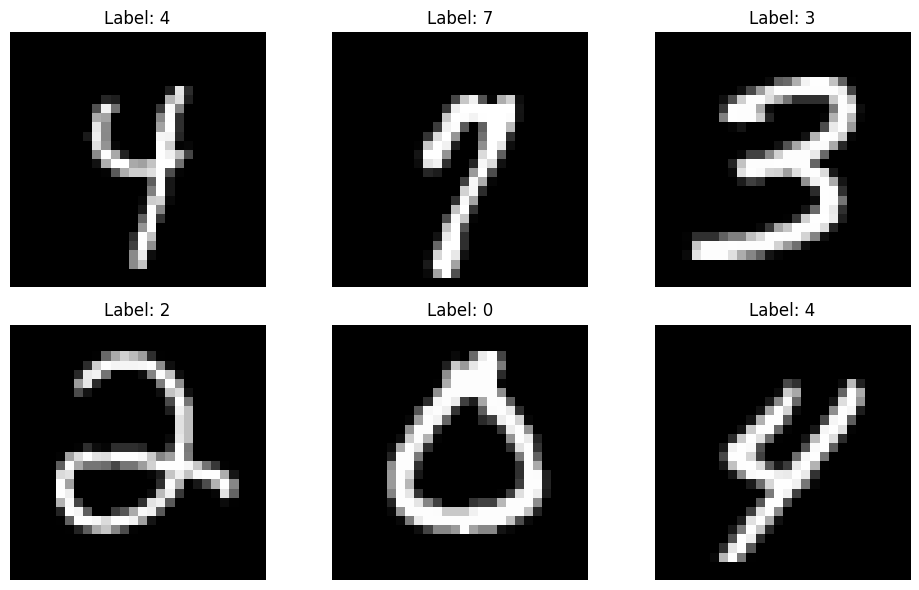

In [266]:
import matplotlib.pyplot as plt
import snntorch.spikeplot as splt

random_positions = torch.randint(0, len(mnist_train), (6,))
train_images = [mnist_train[i][0][0] for i in random_positions]
train_labels = [mnist_train[i][1] for i in random_positions]

fig, axes = plt.subplots(2, 3, figsize=(10, 6))

for i, ax in enumerate(axes.flat):
    ax.imshow(train_images[i], cmap='gray')
    ax.axis('off')
    
    ax.set_title(f"Label: {train_labels[i]}")

plt.tight_layout()
plt.show()

In [267]:
from torch.utils.data import DataLoader

train_loader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True)

In [268]:
from snntorch import spikegen

num_steps = 100

spike_data_list = [
    spikegen.rate(image, num_steps=num_steps, gain=0.5)
    for image in train_images
]

In [269]:

# from IPython.display import HTML

# plt.rcParams['animation.ffmpeg_path'] = 'C:/ffmpeg/ffmpeg-master-latest-win64-gpl/bin/ffmpeg.exe'

# animations = []

# for spike_data_sample in spike_data_list:
#     fig, ax = plt.subplots()
#     anim = splt.animator(spike_data_sample, fig, ax)
#     animations.append(anim)

# combined_html = ""
# for anim in animations:
#     combined_html += anim.to_html5_video() + "<br>"

# HTML(combined_html)

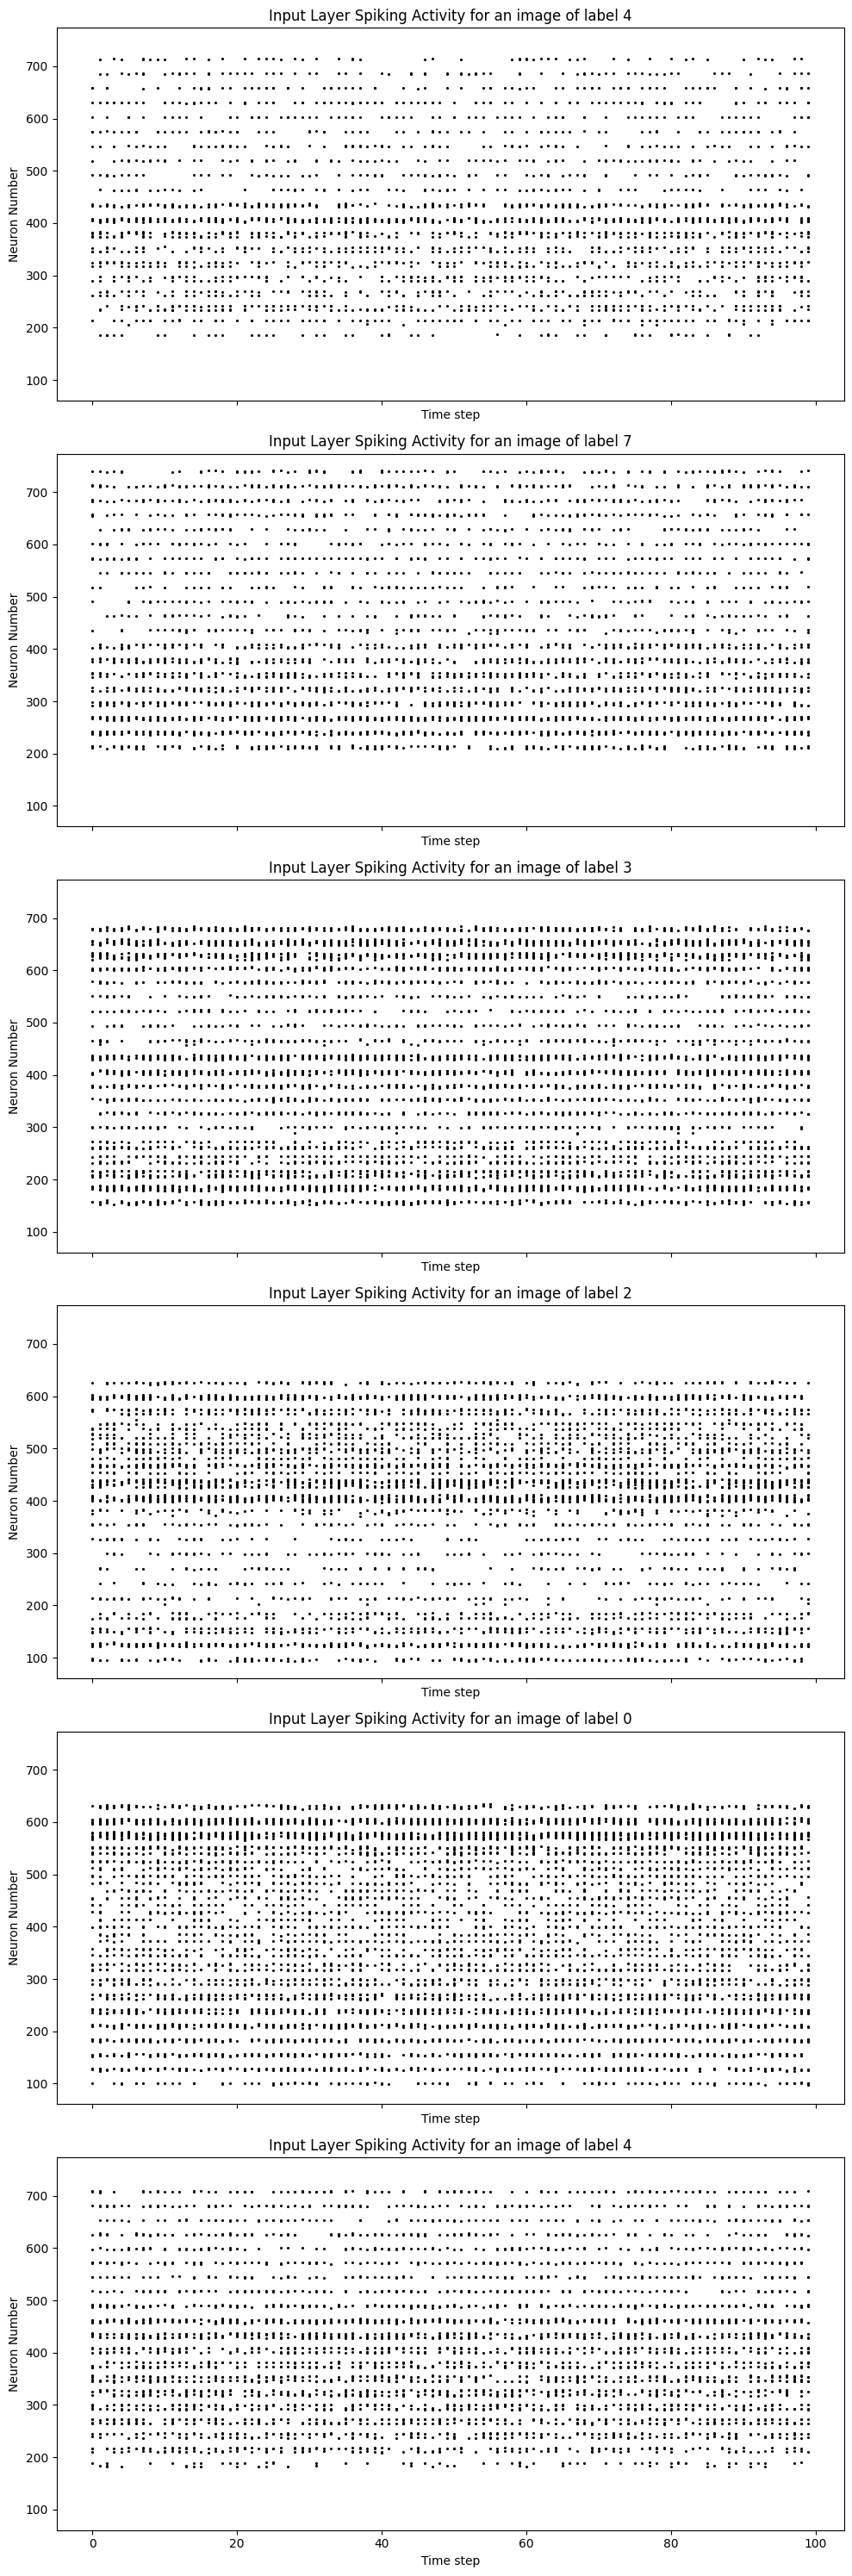

In [272]:
num_samples = len(spike_data_list)
fig, axes = plt.subplots(num_samples, 1, figsize=(10, 5*num_samples), sharex=True, sharey=True)

# Iterate over each item in spike_data_list and generate raster plots
for idx, (spike_data_sample, ax) in enumerate(zip(spike_data_list, axes)):
    spike_data_sample_reshaped = spike_data_sample.reshape((num_steps, -1))

    # Plot raster plot for the current sample
    splt.raster(spike_data_sample_reshaped, ax, s=1.5, c="black")

    ax.set_title(f"Input Layer Spiking Activity for an image of label {train_labels[idx]}")
    ax.set_xlabel("Time step")
    ax.set_ylabel("Neuron Number")

plt.tight_layout()
plt.show()